# SLU04 - Basic Stats with Pandas: Exercises notebook

In these exercises, we'll use a dataset with information on books from [Goodreads](https://www.goodreads.com/). Goodreads is a platform that allows users to rate and review books. The dataset comes from [Kaggle](https://www.kaggle.com/bahramjannesarr/goodreads-book-datasets-10m).


## Objective

In these exercises, the objective is for you to learn how to use pandas to obtain simple statistics of datasets. The following will be tested:
- Minimum, maximum, argmin, argmax
- Mean, median & mode
- Standard deviation and variance
- Skewness & Kurtosis
- Quantiles
- Outliers & how to deal with them

## Dataset information

![](media/goodreads.png)

This dataset contains a sample of ~53,000 books rated and reviewed by users on Goodreads.

The fields in the dataset are the following:

- `Id`: Unique Goodreads identifier
- `ISBN`: Unique book identifier (International Standard Book Number) 
- `Title`: Title of the book
- `Authors`: Authors of the book
- `PagesNumber`: Number of pages
- `Publisher`: Company that published the book
- `PublishYear`: Year the book was published
- `PublishMonth`: Month the book was published
- `PublishDay`: Day the book was published
- `CountsOfReview`: Number of reviews
- `CountsOfRating`: Number of ratings
- `Rating`: Average rating of the book

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import hashlib

In [2]:
data = pd.read_csv('data/sample_goodreads_books.csv').set_index("Id")
data.head()

,ISBN,Title,Authors,PagesNumber,Publisher,PublishYear,PublishMonth,PublishDay,CountsOfReview,CountsOfRating,Rating
Id,,,,,,,,,,,
1,NaN,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,652,Scholastic Inc.,2006,9,16,28062,2298124,4.57
2,439358078,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,870,Scholastic Inc.,2004,9,1,29770,2358637,4.50
3,NaN,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,309,Scholastic Inc,2003,11,1,75911,6587388,4.47
4,439554896,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,352,Scholastic,2003,11,1,244,2560657,4.42
5,043965548X,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,435,Scholastic Inc.,2004,5,1,37093,2610317,4.57


----

# Exercise 1 

Let's start by having a look at the `CountsOfReview` variable.
 - How many reviews has the most reviewed book? What is its `Id`? What is its `Title`?
 - How many reviews has the least reviewed book? What is its `Id`? What is its `Title`?

In [3]:
number_reviews_most_reviewed_book = data.CountsOfReview.max()
id_most_reviewed_book = data.CountsOfReview.idxmax()
title_most_reviewed_book = data.loc[data.CountsOfReview.idxmax(), 'Title']

number_reviews_least_reviewed_book = data.CountsOfReview.min()
id_least_reviewed_book = data.CountsOfReview.idxmin()
title_least_reviewed_book = data.loc[data.CountsOfReview.idxmin(), 'Title']


# YOUR CODE HERE
# NotImplementedError()

##### Asserts

In [4]:
number_reviews_most_reviewed_book_hash = "16566de61d8485ee0c7bdeda75061d2f1433ee3f7c3e93e6f62a9d5b68380d3d"
id_most_reviewed_book_hash = "4c3470ee4b24aed9c6f7a83b0326f61081770f91569046d6b3708d1786bb22be"
title_most_reviewed_book_hash = "45954ffe8b6bfa3f1b2e46afe4435937d34047ace050c73166f0f99917537ee1"
number_reviews_least_reviewed_book_hash = "e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855"
id_least_reviewed_book_hash = "878f32f76b159494f5a39f9321616c6068cdb82e88df89bcc739bbc1ea78e1f9"
title_least_reviewed_book_hash = "a2bb6daef758750623cdfb30fbb84dbce7a26c624a91ecd3cd414cd3b6eaf8b7"

assert number_reviews_most_reviewed_book_hash == hashlib.sha256(bytes(number_reviews_most_reviewed_book)).hexdigest()
assert id_most_reviewed_book_hash == hashlib.sha256(bytes(id_most_reviewed_book)).hexdigest()
assert title_most_reviewed_book_hash == hashlib.sha256(bytes(title_most_reviewed_book, "utf-8")).hexdigest()
assert number_reviews_least_reviewed_book_hash == hashlib.sha256(bytes(number_reviews_least_reviewed_book)).hexdigest()
assert id_least_reviewed_book_hash == hashlib.sha256(bytes(id_least_reviewed_book)).hexdigest(), "If there are multiple "\
"books with the minimum amount of reviews, return the id of the first occurrence."
assert title_least_reviewed_book_hash == hashlib.sha256(bytes(title_least_reviewed_book, "utf-8")).hexdigest(), "If there "\
"are multiple books with the minimum amount of reviews, return the title of the first occurrence."

----

# Exercise 2

However, remember that `idxmax` and `idxmin` only return the index of the first of occurrence.

Find how many books share the maximum and minimum number of reviews.

In [5]:
data[data.CountsOfReview == data.CountsOfReview.max()]

,ISBN,Title,Authors,PagesNumber,Publisher,PublishYear,PublishMonth,PublishDay,CountsOfReview,CountsOfRating,Rating
Id,,,,,,,,,,,
41865,316015849,"Twilight (Twilight, #1)",Stephenie Meyer,501,"Little, Brown and Company",2006,9,6,94850,4734773,3.59


In [6]:
data1 = data[data.CountsOfReview== data.CountsOfReview.max()]
number_most_reviewed_books = len(data1.index)
data2 = data[data.CountsOfReview== data.CountsOfReview.min()]
number_least_reviewed_books = len(data2.index)

# YOUR CODE HERE
#raise NotImplementedError()

##### Asserts

In [7]:
number_most_reviewed_books_hash = "6e340b9cffb37a989ca544e6bb780a2c78901d3fb33738768511a30617afa01d"
number_least_reviewed_books_hash = "de35468b490dd59675d88ef1061fb99259c0f0736f20b51ff77e95386930eecf"

assert number_most_reviewed_books_hash == hashlib.sha256(bytes(number_most_reviewed_books)).hexdigest()
assert number_least_reviewed_books_hash == hashlib.sha256(bytes(number_least_reviewed_books)).hexdigest()

----

# Exercise 3

In the previous exercises, we had a look at the number of reviews. A review is when a user posts its opinion of a book. Alternatively, users are also able to rate the book. Ratings go from 1 (worst) to 5 (best). In the end, each book's final rating will be the average of all individual ratings.

In this exercise, we are going to analyse each book's final rating. Find the following information:
- What is the minimum and maximum rating?
- What is the most common rating?
- What is the average rating?
- What is the median rating?
- What is the standard deviation of the ratings?
- What is the variance of the ratings?

In [8]:
data.Rating.mode()

0    4.0
dtype: float64

In [9]:
maximum = data.Rating.max()
minimum = data.Rating.min()
most_common = data.Rating.mode()[0] # Hint: you should return a number, not a pandas Series :)
average = data.Rating.mean()
median = data.Rating.median()
standard_deviation = data.Rating.std()
variance = data.Rating.var()

# YOUR CODE HERE
#raise NotImplementedError()

##### Asserts

In [10]:
maximum_hash = "8855508aade16ec573d21e6a485dfd0a7624085c1a14b5ecdd6485de0c6839a4"
minimum_hash = "6e340b9cffb37a989ca544e6bb780a2c78901d3fb33738768511a30617afa01d"

assert maximum_hash == hashlib.sha256(bytes(int(maximum))).hexdigest()
assert minimum_hash == hashlib.sha256(bytes(int(minimum))).hexdigest()
assert math.isclose(most_common, 4, abs_tol = 0.01)
assert math.isclose(average, 3.89, abs_tol = 0.01)
assert median == 3.93
assert math.isclose(standard_deviation, 0.432, abs_tol = 0.01)
assert math.isclose(variance, 0.186, abs_tol = 0.01)

----

# Exercise 4

In the previous exercise, you calculated some basic statistics on each book's final rating. Have a look at the numbers you got again.

- Are the mean, median, and mode closer to the maximum or the minimum?
- Is the median smaller or larger than the mean? Is the mode smaller or larger than the mean?
- Given your answers to the questions above, do you expect the distribution of ratings to be skewed? If so, do you expect it to be positively or negatively skewed?

Plot a histogram for the distribution of ratings with 20 bins. Can you visually confirm if the distribution is skewed?

Compute the skewness measure. Is it positive or negative?

The skewness measure is -1.030.


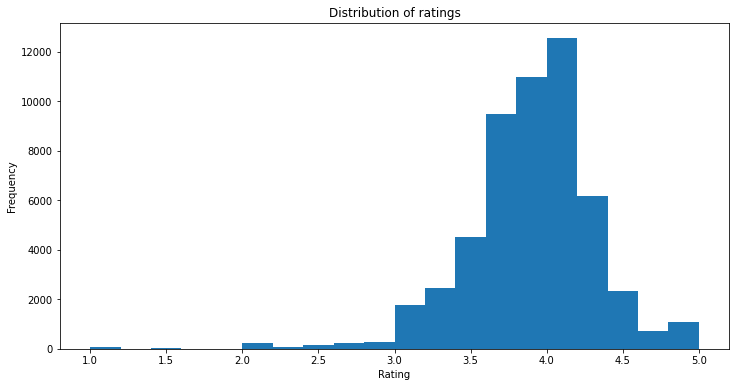

In [11]:
# plot a histogram
data.Rating.plot.hist(bins=20, figsize=(12, 6))
plt.xlabel('Rating')
plt.title('Distribution of ratings');

# compute the skewness measure
skew = data.Rating.skew()

# YOUR CODE HERE
#raise NotImplementedError()

print("The skewness measure is {:.3f}.".format(skew))

##### Asserts

In [12]:
assert math.isclose(skew, -1.030, abs_tol=0.01)

----

# Exercise 5

Many books happen to have "extreme" ratings as a consequence of not being very popular. When a book is rated by many users, its final rating will tend to be more stable around the mean.

Let's have a look at the distribution of ratings when we only consider books with more than 100 ratings.

When comparing this new distribution with the one from the previous exercise:
- Which distribution do you expect to have more kurtosis (i.e., a longer "tail")? Why?
- Which distribution do you expect to be more skewed? Why?

Plot a histogram with 20 bins for each of the distributions and select the correct answer.

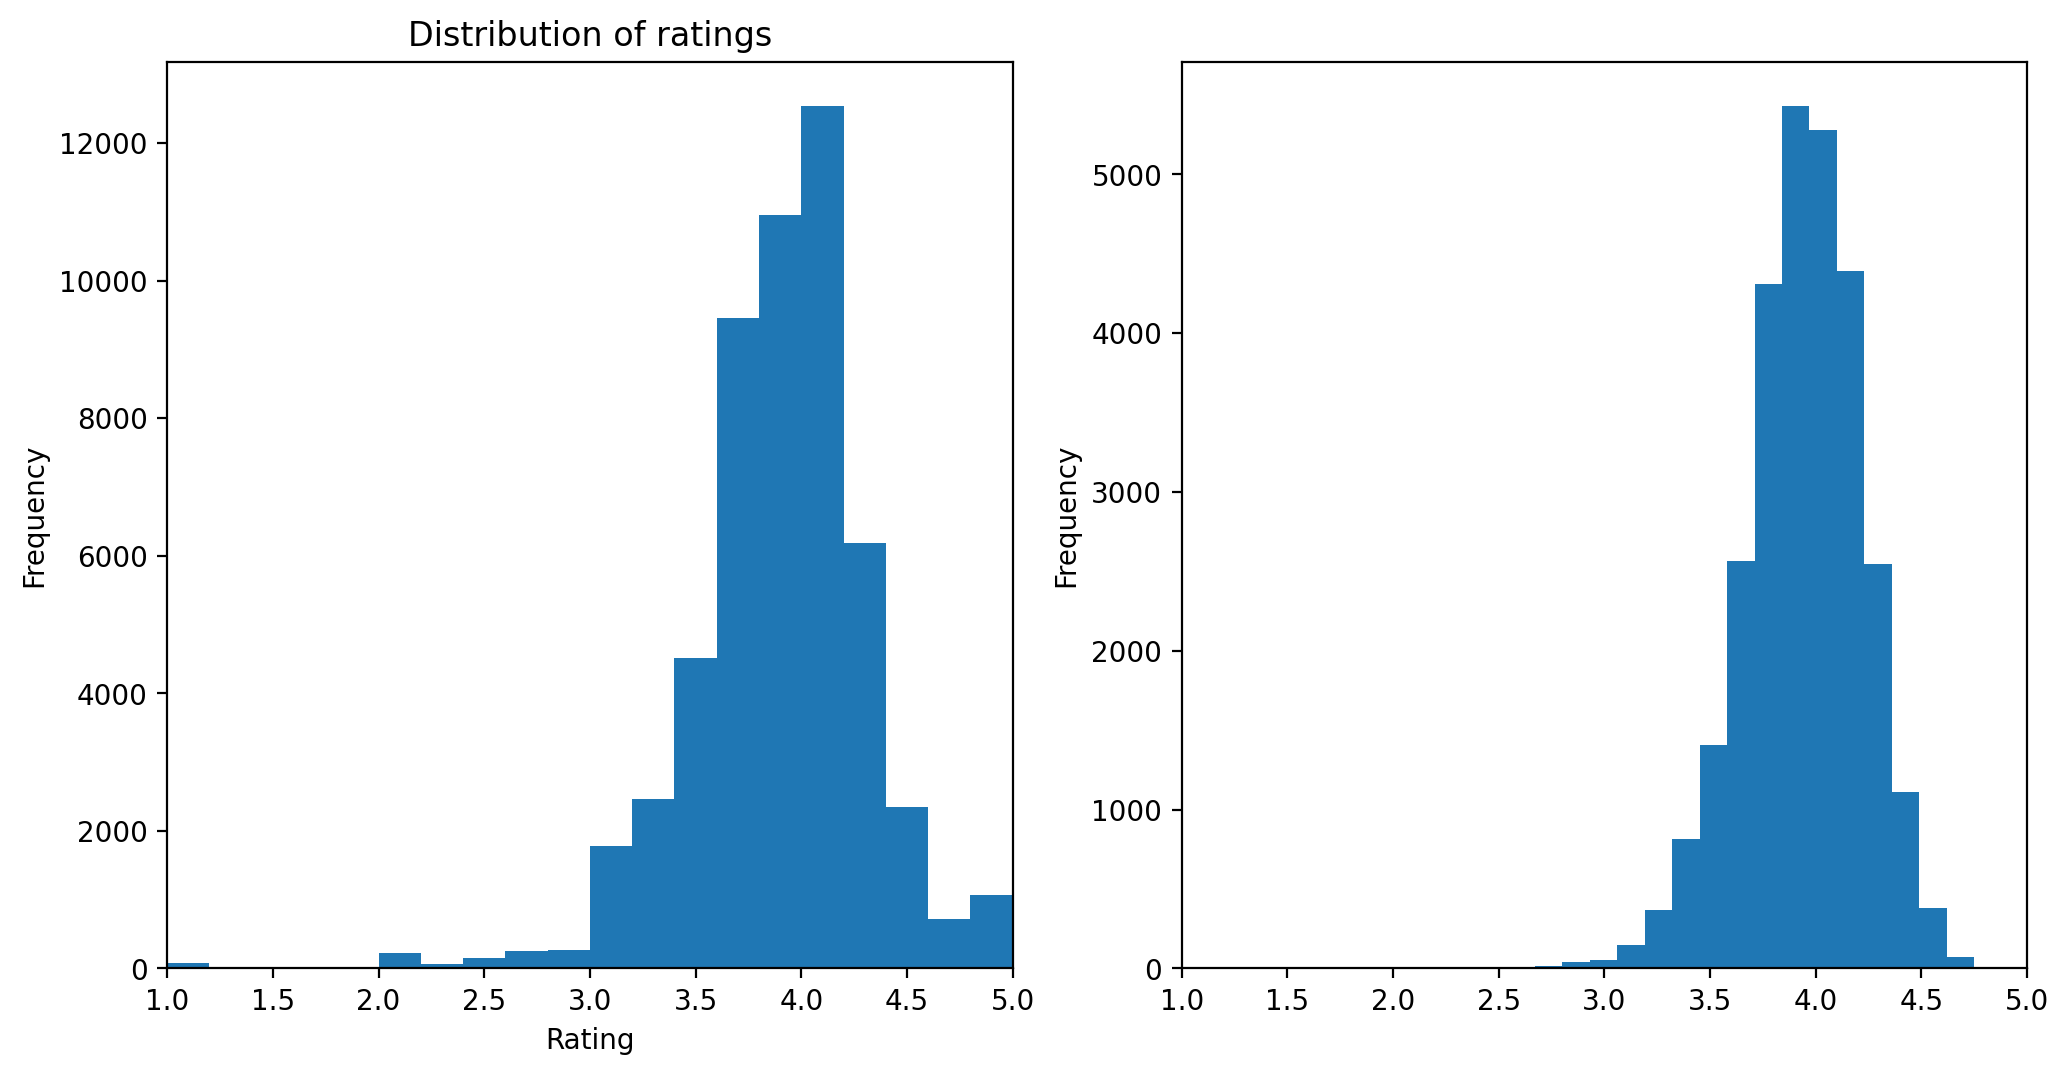

In [13]:
## create a new dataset comprised of books with more than 100 ratings
data_more_than_100_ratings = data[data["CountsOfRating"] > 100]

## plot two histograms, side-by-side
plt.figure(1, figsize=(12,4), dpi=200)
plt.xlabel('Rating')
plt.title('Distribution of ratings');
plt.subplot(121)
plt.xlim(1, 5)
## plot first histogram (using the data variable)
data.Rating.plot.hist(bins=20, figsize=(12, 6))
plt.xlabel('Rating')
plt.title('Distribution of ratings');
plt.subplot(122)
plt.xlim(1, 5)
## plot second histogram (using the data_more_than_100_ratings variable)
data_more_than_100_ratings.Rating.plot.hist(bins=20, figsize=(12, 6))

# which one of the following statements is correct?
# A) Distribution 1 is more skewed and has higher kurtosis
# B) Distribution 1 is more skewed; Distribution 2 has higher kurtosis
# C) Distribution 2 is more skewed; Distribution 1 has higher kurtosis
# D) Distribution 2 is more skewed and has higher kurtosis

# answer "A", "B", "C" or "D"
answer = "A"

# YOUR CODE HERE
#raise NotImplementedError()

##### Asserts

In [14]:
answer_hash = "559aead08264d5795d3909718cdd05abd49572e84fe55590eef31a88a08fdffd"

assert answer_hash == hashlib.sha256(bytes(answer, "utf-8")).hexdigest()

----

# Exercise 6

Verify your previous answer by computing the skewness and kurtosis for each distribution. 

In [15]:
skew = data.Rating.skew()
skew_more_than_100_ratings =data_more_than_100_ratings.Rating.skew()
kurt = data.Rating.kurt()
kurt_more_than_100_ratings = data_more_than_100_ratings.Rating.kurt()

# YOUR CODE HERE
#raise NotImplementedError()

print("The skewness measure for the original distribution is {:.3f}.".format(skew))
print("The skewness measure for the new distribution is {:.3f}.".format(skew_more_than_100_ratings))
print("The kurtosis measure for the original distribution is {:.3f}.".format(kurt))
print("The kurtosis measure for the new distribution is {:.3f}.".format(kurt_more_than_100_ratings))

The skewness measure for the original distribution is -1.030.
The skewness measure for the new distribution is -0.456.
The kurtosis measure for the original distribution is 5.110.
The kurtosis measure for the new distribution is 0.762.


##### Asserts

In [16]:
assert math.isclose(skew, -1.030, abs_tol=0.01)
assert math.isclose(skew_more_than_100_ratings, -0.456, abs_tol=0.01)
assert math.isclose(kurt, 5.110, abs_tol=0.01)
assert math.isclose(kurt_more_than_100_ratings, 0.762, abs_tol=0.01)

----

# Exercise 7

Find the value of the first, second, and third quartiles of the distribution of ratings. Did you notice the value of the second quartile is equal to the median calculated in Exercise 3?

*Note: Always use the `data` variable going forward. The `data_more_than_100_ratings` variable will no longer be used.*

In [17]:
# output quartiles as pandas Series
quartiles = [.25, .5, .75]
rating_quartiles = data.Rating.quantile(q=quartiles)

# YOUR CODE HERE
#raise NotImplementedError()

##### Asserts

In [18]:
assert isinstance(rating_quartiles, pd.Series)
assert math.isclose(rating_quartiles.sum(), 11.74, abs_tol=0.01)

---

# Exercise 8

In this exercise, obtain:

- A list with all the unique years during which books were published;
- A Series with the number of unique values in each column of the `data` DataFrame.

In [19]:
unique_years_published = list(data.PublishYear.unique()) # the output has to be a list
unique_values_per_col = data.nunique() # the output has to be a pandas Series

# YOUR CODE HERE
#raise NotImplementedError()

##### Asserts

In [20]:
unique_years_published_sum_hash = "0dcf580f5f74465642419ae9f8c56ea2cb4116d8d2c37f4ee4e3dcd45c50f1f0"
unique_values_per_col_sum_hash = "c0d65c59da4aefb4f96021a31bd41ad083eb617c15824609a7dc6e0038cf3a53"

assert isinstance(unique_years_published, list), "Make sure the output is a list. Hint: you might have to convert a numpy "\
"array or a set to a list."
assert unique_years_published_sum_hash == hashlib.sha256(bytes(sum(unique_years_published))).hexdigest(), "Check that you " \
"have only unique years."
assert isinstance(unique_values_per_col, pd.Series)
assert unique_values_per_col_sum_hash == hashlib.sha256(bytes(unique_values_per_col.sum())).hexdigest()

----

# Exercise 9

In this last exercise, we will focus on the number of ratings (`CountsOfRating` column). As you know, while most books are relatively unknown (e.g., in this sample 45% of the books have less than 100 ratings), some books do become massively popular with millions of ratings.

Consequently, when you plot this distribution in a histogram, it's very easy to detect the presence of massive outliers.

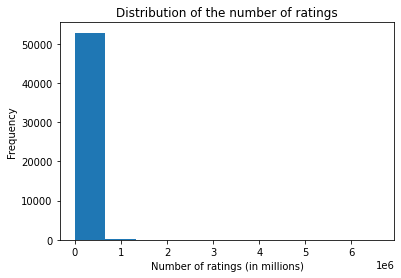

In [21]:
data["CountsOfRating"].plot.hist()
plt.xlabel('Number of ratings (in millions)')
plt.title('Distribution of the number of ratings');

How to deal with these outliers?

In the Learning Notebook, you learned a few ways to deal with the outliers, in case they are negatively affecting your Machine Learning models. In this exercise, let's explore the **log transformation** and see if it helps us in this case.

Do the following:
- Obtain the mean and the median of the number of ratings; which one is greater?
- Create a new column named `Log_CountsOfRating` with the log of the number of ratings;
- Obtain the mean and the median of the log of the number of ratings; are they very different from each other?
- Plot `Log_CountsOfRating` using a histogram with 30 bins. Compare the results.

What do you think? Were the outliers dealt with?

In [22]:
data.head(n=3)

,ISBN,Title,Authors,PagesNumber,Publisher,PublishYear,PublishMonth,PublishDay,CountsOfReview,CountsOfRating,Rating
Id,,,,,,,,,,,
1,NaN,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,652,Scholastic Inc.,2006,9,16,28062,2298124,4.57
2,439358078,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,870,Scholastic Inc.,2004,9,1,29770,2358637,4.50
3,NaN,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,309,Scholastic Inc,2003,11,1,75911,6587388,4.47


The number of ratings has mean 16887 and median 151
The log of the number of ratings has mean 5.2 and median 5.0


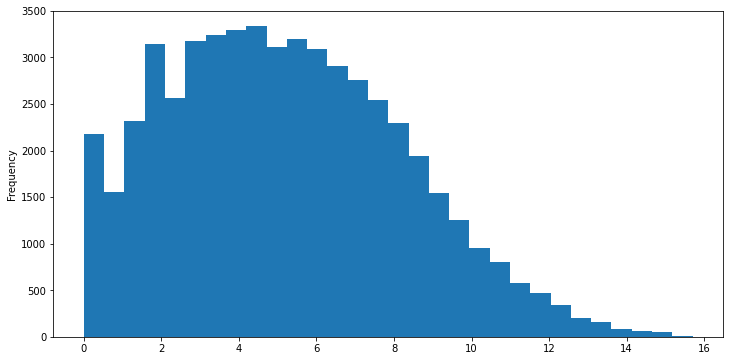

In [23]:
number_of_ratings_mean =data.CountsOfRating.mean()
number_of_ratings_median = data.CountsOfRating.median()

# create new column named Log_CountsOfRating with the log of the number of ratings
data['Log_CountsOfRating']=np.log(data.CountsOfRating)

log_number_of_ratings_mean = data.Log_CountsOfRating.mean()
log_number_of_ratings_median = data.Log_CountsOfRating.median()

## Plot an histogram (with 30 bins) of the log of the number of ratings

data.Log_CountsOfRating.plot.hist(bins = 30,figsize=(12, 6))

# YOUR CODE HERE
#raise NotImplementedError()

print('The number of ratings has mean %d and median %d' % (number_of_ratings_mean, number_of_ratings_median))
print('The log of the number of ratings has mean %0.1f and median %0.1f' % (log_number_of_ratings_mean, log_number_of_ratings_median))

##### Asserts

In [24]:
assert math.isclose(number_of_ratings_mean, 16887.4, abs_tol=0.1)
assert math.isclose(number_of_ratings_median, 151.0, abs_tol=0.1)
assert math.isclose(log_number_of_ratings_mean, 5.21, abs_tol=0.01)
assert math.isclose(log_number_of_ratings_median, 5.02, abs_tol=0.01)
assert math.isclose(data['Log_CountsOfRating'].sum(), 276994.25, abs_tol=0.1)

----

Congratulations! You have finished. Good luck with the upcoming SLUs!

![](media/complete.gif)